In [98]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
%autoreload
from tqdm.notebook import tqdm
import numpy as np
from diff3d import DLA_diff3d
from diff2d import DLA_diff2d

import seaborn as sns
from collections import Counter
import itertools
import matplotlib.pyplot as plt

sns.set()
sns.set_context("poster")

In [100]:
def generate_tree_diff3d(PS):
    x, y, z = [40, 60, 40]
    eta = 1
    dla = DLA_diff3d(seed=[x//2, y - 1, z//2], x = x, y = y, z = z, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [101]:
def generate_tree_diff2d(PS):
    x, y = [40, 80]
    eta = 1
    dla = DLA_diff2d(seed=[x//2, y - 1], x = x, y = y, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [102]:
#insert models here

In [103]:
simulations = 100
PSs = [10, 20, 30, 40, 50]

generated_trees = dict()


In [104]:
for PS in PSs:
    generated_trees[PS] = []

In [105]:
for PS in PSs:
    for _ in range(simulations):
        # change model here
        generated_trees[PS].append(generate_tree_diff2d(PS))
        
generated_trees

{10: [<diff2d.DLA_diff2d at 0x7fec70e0cd30>,
 20: [<diff2d.DLA_diff2d at 0x7fec715f8630>,
 30: [<diff2d.DLA_diff2d at 0x7fec7179b080>,
 40: [<diff2d.DLA_diff2d at 0x7fec722b3e80>,
 50: [<diff2d.DLA_diff2d at 0x7fec73848c88>,
  <diff2d.DLA_diff2d at 0x7fec73dcfc18>]}

In [106]:
# for PS in PSs:
#     plt.figure()
#     branch_orders = []
#     for tree in generated_trees[PS]:
#         branch_orders += tree.tree.get_branch_orders()
#     plt.hist(branch_orders, bins = max(branch_orders))
#     plt.title("{}".format(PS))

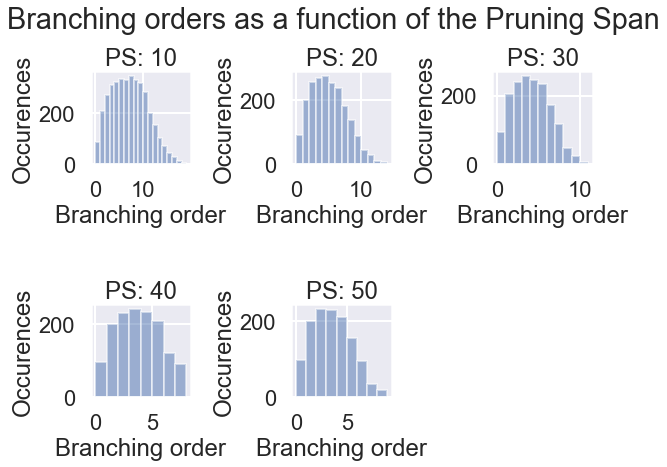

In [107]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))
ax = ax.flatten()
counter  = 0
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    ax[counter].hist(branch_orders, alpha = 0.5, bins = max(branch_orders))
    ax[counter].set_title("PS: {}".format(PS))
    ax[counter].set_xlabel("Branching order")
    ax[counter].set_ylabel("Occurences")
    counter += 1

fig.delaxes(ax[counter])
fig.subplots_adjust(wspace = 1, hspace = 1.5)
fig.suptitle("Branching orders as a function of the Pruning Span", y = 1.03)
plt.ylabel("Occurences")
plt.show()

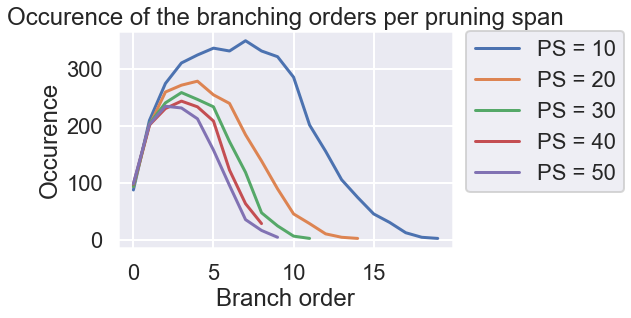

In [108]:
plt.figure()
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    plt.plot(x, y, label='PS = {}'.format(PS))
        
plt.title("Occurence of the branching orders per pruning span")
plt.xlabel("Branch order")
plt.ylabel("Occurence")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()

In [109]:
means = []
errors = []
for PS in PSs:
    length_ratio = []

    for tree in generated_trees[PS]:
        length_ratio.append(tree.tree.get_lenghts_ratio())
        
    mean = np.mean(length_ratio)
    std = np.std(length_ratio)
    means.append(mean)
    errors.append(std)
    
    print("Length ratio = {} +- {}. For PS = {}".format(mean, std, PS))
    

Length ratio = 0.7958208611669616 +- 0.15772793932634147. For PS = 10
Length ratio = 0.608629328522616 +- 0.22437057744703554. For PS = 20
Length ratio = 0.5130630097477321 +- 0.1804426653409747. For PS = 30
Length ratio = 0.4490461092911077 +- 0.16360818793451934. For PS = 40
Length ratio = 0.41090337520729237 +- 0.17298203906021212. For PS = 50


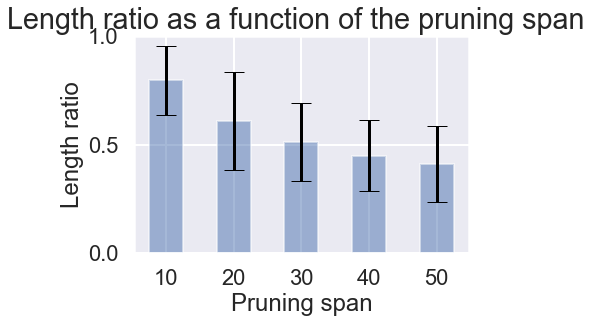

In [110]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Length ratio')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Length ratio as a function of the pruning span")
plt.show()


In [111]:
means = []
errors = []
for PS in PSs:
    asym = []

    for tree in generated_trees[PS]:
        asym.append(tree.tree.get_asymmetry_index())
    
    mean = np.mean(asym)
    std = np.std(asym)
    means.append(mean)
    errors.append(std)
    print("Asymmetry index = {} +- {}. For PS = {}".format(mean, std, PS))
    

Asymmetry index = 0.6770583685093757 +- 0.08386981012347201. For PS = 10
Asymmetry index = 0.6954206302956303 +- 0.12963140808725035. For PS = 20
Asymmetry index = 0.6838328282828283 +- 0.15358600917926346. For PS = 30
Asymmetry index = 0.6940363756613757 +- 0.14770346386569197. For PS = 40
Asymmetry index = 0.6843908730158728 +- 0.17410801916073057. For PS = 50


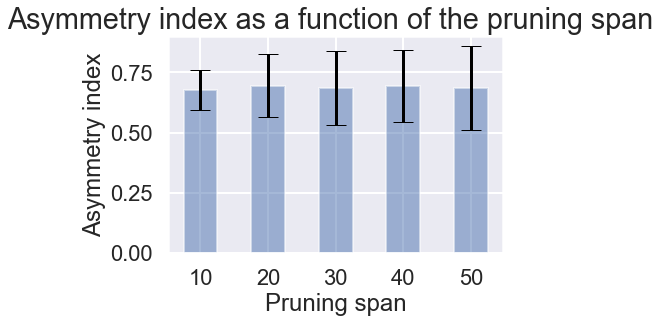

In [112]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Asymmetry index')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Asymmetry index as a function of the pruning span")
plt.show()

In [113]:
# beware for change in function name, leafs!=terminal segments
means = []
errors = []

for PS in PSs:
    leafs = []

    for tree in generated_trees[PS]:
        leafs.append(tree.tree.get_number_of_terminal_segments())
    
    mean = np.mean(leafs)
    std = np.std(leafs)
    means.append(mean)
    errors.append(std)
    
    print("Terminal leafs = {} +- {}. For PS = {}".format(mean, std, PS))



Terminal leafs = 20.12 +- 2.3718347328597753. For PS = 10
Terminal leafs = 11.23 +- 2.0092535927552797. For PS = 20
Terminal leafs = 8.85 +- 1.5190457530963313. For PS = 30
Terminal leafs = 7.75 +- 1.3444329659748753. For PS = 40
Terminal leafs = 7.01 +- 1.4798310714402507. For PS = 50


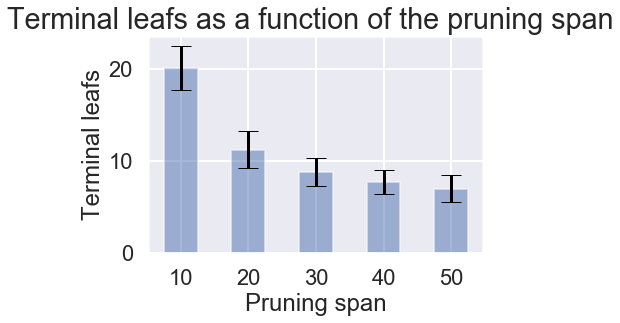

In [114]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Terminal leafs')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Terminal leafs as a function of the pruning span")
plt.show()